## 1. 라이브러리 로딩

In [83]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [86]:
from sklearn.ensemble import RandomForestClassifier

## 2.데이터 로딩 밑 확인

In [87]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
train = pd.read_csv('/content/drive/MyDrive/All-in/train.csv')
test = pd.read_csv('/content/drive/MyDrive/All-in/test.csv') 
submission = pd.read_csv('/content/drive/MyDrive/All-in/submission.csv')

* id: 고유 id
* hour: 시간
* temperature: 기온
* precipitation: 비가 오지 않았으면 0, 비가 오면 1
* windspeed: 풍속(평균)
* humidity: 습도
* visibility: 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone: 오존
* pm10: 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* pm2.5: 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
*count: 시간에 따른 따릉이 대여 수


In [89]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [91]:
print(train.columns.values)

['id' 'hour' 'hour_bef_temperature' 'hour_bef_precipitation'
 'hour_bef_windspeed' 'hour_bef_humidity' 'hour_bef_visibility'
 'hour_bef_ozone' 'hour_bef_pm10' 'hour_bef_pm2.5' 'count']


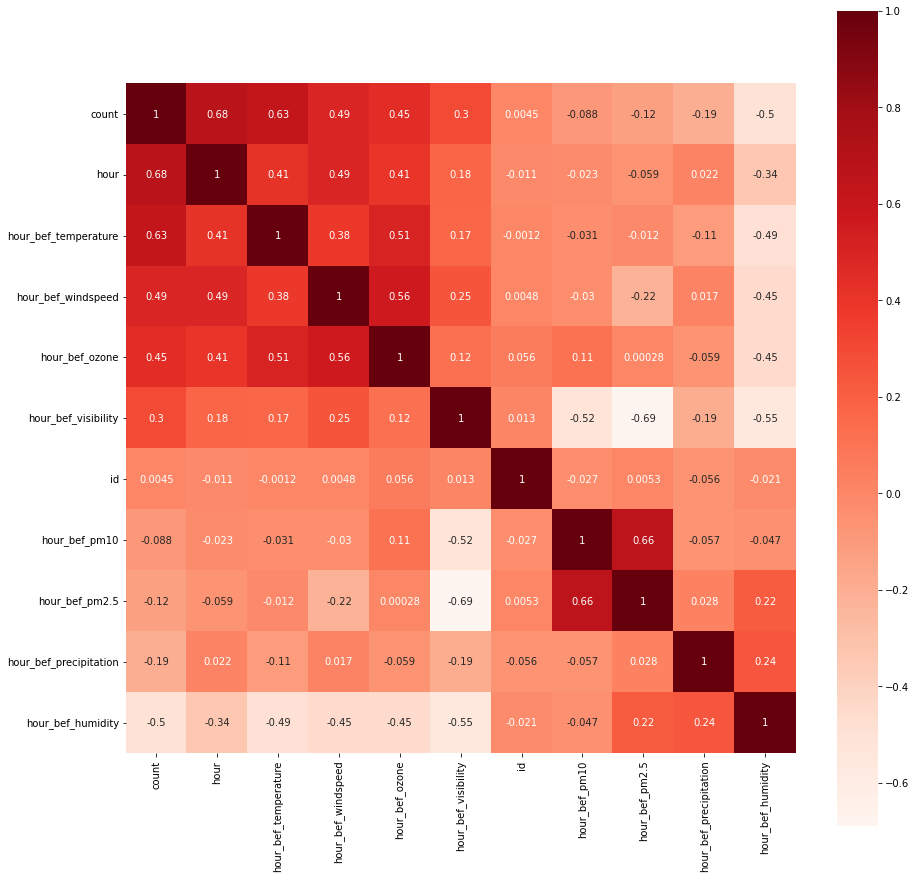

In [92]:
corrmat = train.corr(method='spearman')
indexes = corrmat.nlargest(n=11, columns='count').index
corrmat = train[indexes].corr(method='spearman')
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(corrmat,annot=True, square=True, cmap ='Reds')

결측치 확인 밑 처리

In [93]:
# null값 처리하기
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [94]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [95]:
train.fillna(0,inplace = True)
test.fillna(0,inplace = True)

In [96]:
test.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

## 3.데이터 시각화
>##### * 시간대별 자전거 이용
>##### * 비가 올때의 자전거 이용
>##### * 미세먼지 pm10일때의 자전거 이용
>##### * 미세먼지가 pm2.5일때의 자전거 이용


In [97]:
# 시간대 별 자전거 이용
train.groupby(['hour'])['count'].mean()

hour
0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

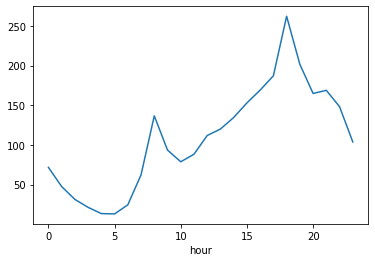

In [98]:
# 시간대 별 자전거 이용 시각화 # import mataplotlib,pyplot as plt
train.groupby(['hour'])['count'].mean().plot()

##### 다른 분이 하신걸 찾아보니까 그래프에 글자도 넣을 수 있었다. 출근시간과 퇴근시간에 확실히 사용량이 많은 것을 한 눈에 알아 볼 수 있게 한번 글씨도 넣어봤다.

##### Q. 어떤 값들을 넣어도 x,y축 구간은 알아서 정해주는건지...?

Text(16, 150, 'leave work')

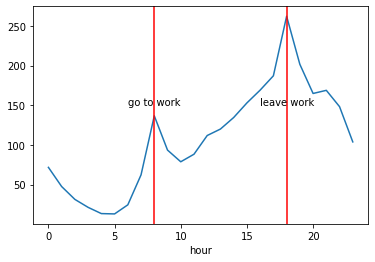

In [99]:
train.groupby(['hour'])['count'].mean().plot()
plt.axvline(x=8,color='r')
plt.axvline(x=18,color='r') # x축 8, 18에 빨간 선 넣어주기
plt.text(6, 150, 'go to work')
plt.text(16, 150, 'leave work') # (6,150), (16,150) 지점에 각각 출근, 퇴근 글씨 넣어주기

# 한글은 문자로 입력되지 않음
# 글자를 입력하면 좌표를 시작으로 생기기 때문에 중간에 입력하려면 하나씩 넣어봐야함

>###### * groupby() : 데이터를 그룹별로 분할하여 독립된 그룹에 대하여 별도로 데이터를 처리(혹은 적용)하거나 그룹별 통계량을 확인하고자 할 때 유용한 함수이다

In [100]:
# 비가 올 때의 자전거 이용
train.groupby(['hour_bef_precipitation'])['count'].mean()

hour_bef_precipitation
0.0    111.001415
1.0     33.673913
Name: count, dtype: float64

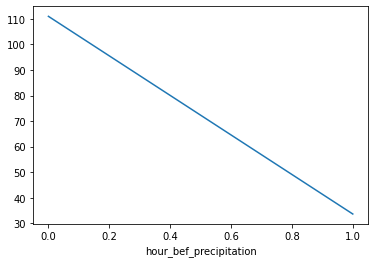

In [101]:
train.groupby(['hour_bef_precipitation'])['count'].mean().plot()

##### 해보고 이건 아니다 싶어서 막대 그래프로 비가 오지 않았으면 0, 비가 오면 1에 대한 수치를 시각화 했다.
##### 찾아보니 막대 그래프 함수는 Matplotlib에서 bar()함수를 기본적으로 사용한다고 하여 사용했다.

In [102]:
# train.groupby(['hour_bef_precipitation'])['count'].mean().plt.bar()
# 에러났고요..

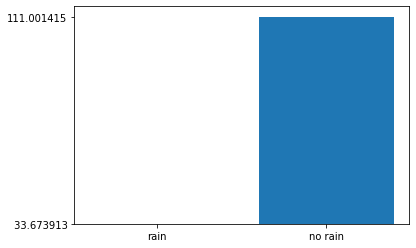

In [103]:
x = np.arange(2)
rain = ['rain', 'no rain'] # rain = 1, no rain = 0
count = [' 33.673913', '111.001415']

plt.bar(x, count)
plt.xticks(x, rain)

plt.show()

>##### 그래도 비가 오지 않을때 사람들이 따릉이를 훨씬 더 많이 사용한다는 것을 알 수 있다.
>##### Q. 비가 올때의 그래프가 아예 보이지 않는데 이거 보이게 하려면 어떻게...?


In [104]:
# 미세먼지 pm10일때의 자전거 이용(미세먼지지)
pm10 =train.groupby(['hour_bef_pm10'])['count'].mean()
print(pm10)

hour_bef_pm10
0.0      81.366667
9.0       8.000000
12.0     21.000000
13.0     38.000000
14.0     95.000000
           ...    
223.0    14.500000
225.0    91.000000
237.0    91.000000
252.0    26.000000
269.0    16.000000
Name: count, Length: 149, dtype: float64


In [105]:
# 미세먼지 pm2.5일때의 자전거 이용(초미세먼지)
pm25 =train.groupby(['hour_bef_pm2.5'])['count'].mean()
print(pm25)

hour_bef_pm2.5
0.0      78.700855
8.0      95.000000
9.0     116.166667
10.0    154.222222
11.0    176.785714
           ...    
84.0     60.000000
85.0     76.000000
86.0     73.000000
89.0    122.500000
90.0     44.500000
Name: count, Length: 80, dtype: float64


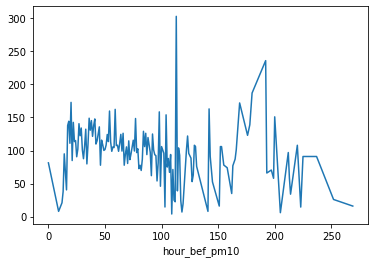

In [106]:
# 미세먼지 pm10일때의 자전거 이용 시각화
train.groupby(['hour_bef_pm10'])['count'].mean().plot()

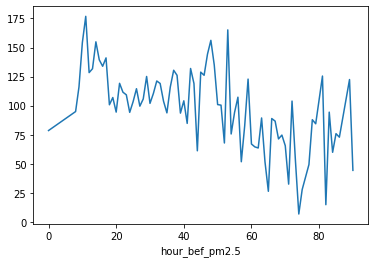

In [107]:
# 미세먼지 pm2.5일때의 자전거 이용 시각화화
train.groupby(['hour_bef_pm2.5'])['count'].mean().plot()

In [108]:
pm25.mean()

97.78942596530467

In [109]:
pm10.mean()

96.53071187560417

두개의 그래프를 놓고 봤을때는 y 축의 단위가 달라 잘 몰랐지만, 두개의 평균을 비교해보니 유의미한 차이는 없는것같다. 사람들이 미세먼지, 초미세 먼지 농도에 따라 상관없이 거의 동일하게 따릉이를 이용한 것같다.

In [110]:
import matplotlib.pyplot as plt
import numpy as np

In [111]:
pm=['pm2.5', 'pm10']
#df = pd.DataFrame[{'hour_bef_pm2.5' : pm25, 'hour_bef_pm10':pm10}, index= pm]

# 바 굵기 조정
#bar_width = 0.25

# 미세먼지가 pm2.5일때, pm10일때 2가지 경우
#index=np.arange(2)

#pm1 = plt.bar(index, train['hour_bef_pm2.5'], bar_width, alpha=0.4, color='blue', label='pm2.5') #미세먼지가 pm2.5일때
#pm2 = plt.bar(index, train['hour_bef_pm10'], bar_width, alpha=0.4, color='red', label='pm10') #미세먼지가 pm10일때

# x축, y축 이름 및 범례 설정
#plt.xlabel('pm_concentration', size = 13)
#plt.ylabel('count', size = 13)
#plt.legend()
#plt.show()

# 결측치 때문일 수도 있다, 평균으로 null 처리 해보기기

## 시각화 결론
>##### 따릉이는 사람들이 출근하고 퇴근 하는 시간인 7시와 17시 에 가장 많이 사용 되었으며, 비가 오지 않을 때는 비가 올때보다 3배 이상의 따릉이가 사용 됨을 알 수 있다. 또한, 미세먼지와 초미세먼지 농도는 사람들이 따릉이를 이용하는데 유의미한 차이를 주지 못했다.

## 4. 데이터 정리

##5. 변수 선택 및 모델 구축

* KNN모형

In [112]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [113]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_jobs = -1)

In [114]:
column = ['hour', 'hour_bef_temperature']
X_train = train[column]
y_train = train['count']
X_test = test[column]

In [115]:
model_5 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 5)
model_7 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 7)
model_9 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 9)

In [116]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 10)

In [117]:
np.mean(cross_val_score(model_5, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-2104.8165902179544

In [118]:
np.mean(cross_val_score(model_7, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-2006.4358973472176

In [119]:
np.mean(cross_val_score(model_9, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-1957.7779508776457

In [120]:
model_9.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=9)

In [121]:
submission['count'] = model_9.predict(X_test)

In [122]:
submission.to_csv('knn_9.csv', index = False)

In [123]:
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0
